<a href="https://colab.research.google.com/github/AftabQuant/Deep-Learning/blob/main/Placement%20Data%20Model%20Using%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('placementdata.csv')

In [ ]:
df.head(3)

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced


In [ ]:
print(df.isnull().sum())

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head(2)

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1


In [ ]:
x = df.iloc[:, :-1]
y = df['PlacementStatus']

In [ ]:
x.shape

(10000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x = ss.fit_transform(x)

In [ ]:
x = pd.DataFrame(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
ann = Sequential()

In [ ]:
ann.add(Dense(units=9, activation='relu'))
ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(units=3, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
ann.fit(x_train, y_train, batch_size=100, epochs=15)

Epoch 1/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7967 - loss: 0.4418
Epoch 2/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8014 - loss: 0.4344
Epoch 3/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8022 - loss: 0.4380
Epoch 4/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8029 - loss: 0.4309
Epoch 5/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8049 - loss: 0.4254
Epoch 6/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7953 - loss: 0.4400
Epoch 7/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8073 - loss: 0.4258
Epoch 8/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7983 - loss: 0.4359
Epoch 9/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8043 - loss: 0.4263
Epoch 10/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8012 - loss: 0.4354
Epoch 11/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7947 - loss: 0.4324
Epoch 12/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8047 - lo

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 79.05


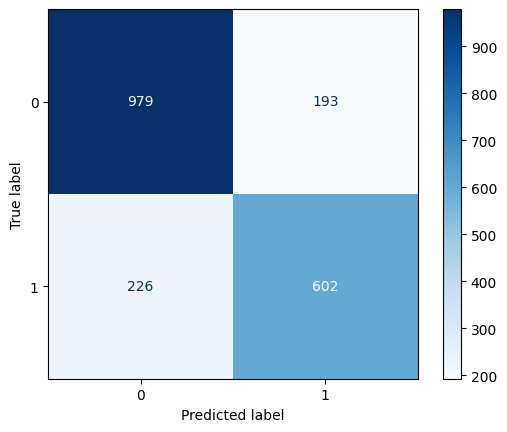

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(cm)
confusion_matrix_display.plot(cmap=plt.cm.Blues)
plt.show()